In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load data
data = pd.read_csv('vejce.csv')

In [4]:
print(data.head())

   CSU_ID               ITEM_NAME  YEAR  MONTH  CSU_AVG_PRICE  \
0  114701  Vejce slepičí čerstvá   2020      1          30.92   
1  114701  Vejce slepičí čerstvá   2020      2          29.77   
2  114701  Vejce slepičí čerstvá   2020      3          29.64   
3  114701  Vejce slepičí čerstvá   2020      4          28.66   
4  114701  Vejce slepičí čerstvá   2020      5          30.14   

   ROHLIK_AVG_PRICE  KOSIK_AVG_PRICE  ITESCO_AVG_PRICE  ROHLIK_DIFF_FROM_CSU  \
0         64.490627        77.052381         40.609677            -33.570627   
1         64.223626        77.688494         37.300000            -34.453626   
2         62.465196        82.145528         36.848387            -32.825196   
3         58.052775        84.659259         37.053333            -29.392775   
4         59.433883        77.701673         37.016129            -29.293883   

   KOSIK_DIFF_FROM_CSU  ITESCO_DIFF_FROM_CSU  ROHLIK_MIN_PRICE  \
0           -46.132381             -9.689677              25.0

In [7]:
data = data[['YEAR', 'MONTH', 'ROHLIK_AVG_PRICE']]

In [8]:
print(data.head())

   YEAR  MONTH  ROHLIK_AVG_PRICE
0  2020      1         64.490627
1  2020      2         64.223626
2  2020      3         62.465196
3  2020      4         58.052775
4  2020      5         59.433883


In [9]:
data['YEAR_MONTH'] = data.YEAR.astype(str) + '/' + data.MONTH.astype(str)

In [10]:
print(data.head())

   YEAR  MONTH  ROHLIK_AVG_PRICE YEAR_MONTH
0  2020      1         64.490627     2020/1
1  2020      2         64.223626     2020/2
2  2020      3         62.465196     2020/3
3  2020      4         58.052775     2020/4
4  2020      5         59.433883     2020/5


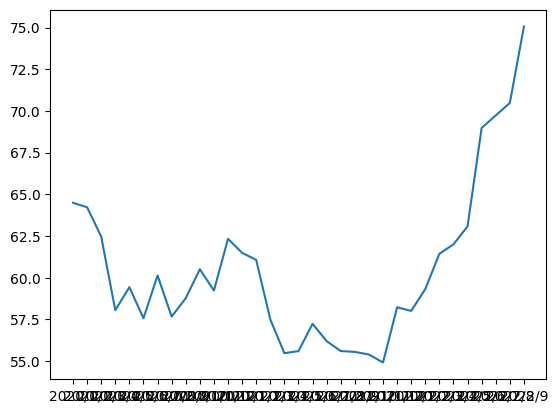

In [11]:
plt.plot(data['YEAR_MONTH'], data['ROHLIK_AVG_PRICE'])
plt.show()

In [12]:
from sklearn import linear_model
X_train = data[['YEAR', 'MONTH']]
y_train = data[['ROHLIK_AVG_PRICE']]

In [13]:
# Define the model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [14]:
# Generate forecast
d = {'YEAR': [2022, 2022, 2022, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023], 'MONTH': pd.Series([10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])}
X_val = pd.DataFrame(data=d, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [15]:
# Generate forecast
y_val = linear_regression.predict(X_val)

In [16]:
X_val['ROHLIK_AVG_PRICE'] = y_val

In [17]:
X_val['YEAR_MONTH'] = X_val.YEAR.astype(str) + '/' + X_val.MONTH.astype(str)

In [18]:
print(X_val.head())

   YEAR  MONTH  ROHLIK_AVG_PRICE YEAR_MONTH
0  2022     10         62.850234    2022/10
1  2022     11         62.844154    2022/11
2  2022     12         62.838075    2022/12
3  2023      1         65.061070     2023/1
4  2023      2         65.054991     2023/2


In [19]:
df = pd.concat([data, X_val])
df.tail(20)

,YEAR,MONTH,ROHLIK_AVG_PRICE,YEAR_MONTH
28,2022,5,63.078701,2022/5
29,2022,6,68.978857,2022/6
30,2022,7,69.729730,2022/7
31,2022,8,70.476364,2022/8
32,2022,9,75.061864,2022/9
0,2022,10,62.850234,2022/10
1,2022,11,62.844154,2022/11
2,2022,12,62.838075,2022/12
3,2023,1,65.061070,2023/1
4,2023,2,65.054991,2023/2


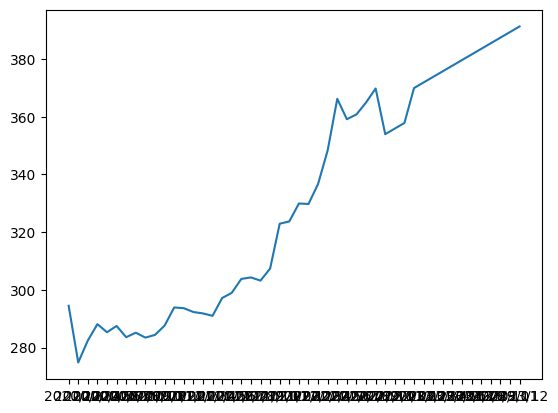

In [40]:
plt.plot(df['YEAR_MONTH'], df['ROHLIK_AVG_PRICE'])
plt.show()